# Plotting Collaborator Characteristics by Seniority

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle

In [2]:
# Reading paths
INDIR = "../../plot_data/4/"
# Path to where we will save our processed files
OUTDIR = "../../plots/"

In [3]:
def create_collaborator_char_plot(categories, retracted_data, non_retracted_data, p_data, color_dict, marker_dict, 
                                  xticks, foutname, create_legend=False, 
                                 letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']):
    # Generate some random data for demonstration

    #retracted_data = np.random.rand(3,3)  # Three categories with three pairs of data points each
    #non_retracted_data = np.random.rand(3, 3)

    # Set the significance threshold for connecting lines
    significance_threshold = 0.05

    # Create the figure with subplots
    fig, axs = plt.subplots(3, 3, figsize=(8, 5.5), sharey='row')
    fig.subplots_adjust(hspace=0.5)

    counter = 0
    
    colors = [color_dict.get(categories[0]),
            color_dict.get(categories[1]),
             color_dict.get(categories[2]),
             color_dict.get(categories[3]),]
    
    # Iterate over each subplot
    for i, ax in enumerate(axs.flat):
        category_index = i % 4  # Determine the category (0, 1, or 2)
        retracted_values = retracted_data[counter]
        non_retracted_values = non_retracted_data[counter]
        pval_values = p_data[counter]
    
        # Connect the dots with solid or dotted lines based on significance
        for j in range(len(retracted_values)):
            line_style = '-' if pval_values[j] < significance_threshold else ':'
            ax.plot([retracted_values[j], non_retracted_values[j]], [j + 1, j + 1], 'k', linestyle=line_style)
            
        # This is the code to go with.
        for x, y, color in zip(retracted_values, [1,2,3,4], colors):
            ax.plot(x, y, color=color, label='Retracted', marker='o')

        for x, y, color in zip(non_retracted_values, [1,2,3,4], colors):
            ax.plot(x, y, color=color, label='Non-retracted', marker='s')


        
        ax.set_xticks(xticks[counter])
        ax.set_xticklabels(xticks[counter])
        
        ax.set_yticks([1, 2, 3, 4])
        ax.set_yticklabels(categories)
        ax.set_ylim(-0.5, 5)
        ax.spines[['right', 'top']].set_visible(False)
        
        ax.invert_yaxis()
        
        ax.annotate(letters[i], xy=(0.05, 0.9), xycoords='axes fraction', fontsize=14, fontweight='bold')
        
        counter += 1
        
        # Labeling the x and y axis
        if(counter == 1):
            ax.set_ylabel('Collaborators\nRetained', labelpad=25, fontsize=12)
            ax.set_xlabel("Academic Age", labelpad=25, fontsize=12)
            ax.xaxis.set_label_position("top")
        
        elif(counter == 2):
            ax.set_xlabel("Number of Papers", labelpad=25, fontsize=12)
            ax.xaxis.set_label_position("top")
            
        elif(counter == 3):
            ax.set_xlabel("Number of Citations", labelpad=25, fontsize=12)
            ax.xaxis.set_label_position("top")
        
        elif(counter == 4):
            ax.set_ylabel('Collaborators\nGained', labelpad=25, fontsize=12)
            
        elif(counter == 7):
            ax.set_ylabel('Difference-in-\nDifference', labelpad=25, fontsize=12)

    #     ax.legend(False)

    # Set the overall title for the figure
    #fig.suptitle('Comparison of Retracted and Non-retracted Scientists', fontsize=16)
    
    if(create_legend):
        # Create a custom legend
        # Let us add items to the legend 
        legend_elements = []
        for key in color_dict.keys():
            colori = color_dict.get(key)
            markeri = marker_dict.get(key)

#             elementi = plt.Line2D([0], [0], marker=markeri, color='w', markerfacecolor=colori, 
#                                   markersize=8, label=key)
    
            elementi = None
        
            if key == "Retracted":
            # Create an empty circle as a marker
                elementi = plt.Line2D([0], [1], marker='o', color=colori, markerfacecolor='none', 
                                      markersize=8, label=key, linestyle='', fillstyle='none')
                legend_elements.append(elementi)
            elif key == "Non-retracted":
            # Create an empty square as a marker
                elementi = plt.Line2D([0], [1], marker='s', color=colori, markerfacecolor='none', 
                                  markersize=8, label=key, linestyle='', fillstyle='none')
                legend_elements.append(elementi)
#             else:
#                 elementi = plt.Line2D([0], [0], color=colori, linewidth=5, label=key)
#                 legend_elements.append(elementi)

            

        #fig.legend(handles=legend_elements, loc='lower right')
        legend = fig.legend(handles=legend_elements, loc='upper center', ncol=len(legend_elements), prop={'size': 11},
                  frameon=False)
        legend.set_bbox_to_anchor((0.5, 0.98))
    
    rect = Rectangle((0, 0), 1, 0.90, transform=fig.transFigure, fill=False, edgecolor='black')

    fig.patches.append(rect)

    # Adjust the layout to accommodate the legend
    plt.tight_layout(rect=[0, 0, 1, 0.90])
    #plt.tight_layout()
    
    plt.savefig(foutname, format='pdf')
    # Show the plot
    #plt.show()


# Plotting Collaborator Characteristics by Reason

In [4]:
def read_dict(fname):
    import pickle
    
    with open(fname, 'rb') as f:
        loaded_dict = pickle.load(f)
        return loaded_dict

    
dict_forAge = read_dict(INDIR+"/collaborator_chars_byAge.pkl")
dict_forReason = read_dict(INDIR+"/collaborator_chars_byReason.pkl")
dict_forAttention = read_dict(INDIR+"/collaborator_chars_byAttention.pkl")

# Let us now create retracted means, and retracted pvals, and non-retracted means, and non-retracted pvals
# We will do so for both stratified by age, and stratified by reason


def create_lists_for_plots(dicto, categories=['Junior','Mid','Senior'], 
                                    scientistType='retracted',
                                    statistic="mean"):
    expFields = ['Academic Age', 'Number of Papers', 'Number of Citations']
    expFields2 = ['AcademicAge', 'MAGCumPapers', 'MAGCumCitations']
    outcomeTypes = ['Retention', 'Gain', 'DiD']
    lstOflst = []
    
    for outcomeType in outcomeTypes:
        for i in range(len(expFields)):
            field1 = expFields[i]
            field2 = expFields2[i]
            lst_i = []
            # going through senior junior and mid-career
            for category in categories:
                statistic_key = ''
                if outcomeType in ['Retention', 'Gain']:
                    statistic_key = 'Collab' + field2 + "AtCollaboration_" + scientistType + "_" + statistic

                elif outcomeType in ['DiD']:
                    statistic_key = 'Diff' + field2 + "AtRetraction_" + scientistType + "_" + statistic

                val = dicto.get(outcomeType).get(field1).get(category).get(statistic_key)
                
                print(field1, field2, outcomeType, scientistType, category, val)
                
                lst_i.append(val)
            lstOflst.append(lst_i)

    return lstOflst



In [5]:
dict_forReason

{'Retention': {'Academic Age': {'Overall': {'CollabAcademicAgeAtCollaboration_retracted_mean': 14.08,
    'CollabAcademicAgeAtCollaboration_retracted_median': 14.1,
    'CollabAcademicAgeAtCollaboration_retracted_std': 7.44,
    'CollabAcademicAgeAtCollaboration_nonretracted_mean': 15.41,
    'CollabAcademicAgeAtCollaboration_nonretracted_median': 14.6,
    'CollabAcademicAgeAtCollaboration_nonretracted_std': 7.09,
    'CollabAcademicAgeAtCollaboration_delta_mean': -1.34,
    'CollabAcademicAgeAtCollaboration_pval_welch': 0.0,
    'CollabAcademicAgeAtCollaboration_CI_95lower': -1.88,
    'CollabAcademicAgeAtCollaboration_CI_95upper': -0.8},
   'Misconduct': {'CollabAcademicAgeAtCollaboration_retracted_mean': 13.6,
    'CollabAcademicAgeAtCollaboration_retracted_median': 13.76,
    'CollabAcademicAgeAtCollaboration_retracted_std': 7.45,
    'CollabAcademicAgeAtCollaboration_nonretracted_mean': 15.05,
    'CollabAcademicAgeAtCollaboration_nonretracted_median': 14.42,
    'CollabAcademicA

In [6]:
def create_pval_lists_for_plots(dicto, categories=['Overall','Junior','Mid','Senior'], 
                                    statistic="pval_welch"):
    
    expFields = ['Academic Age', 'Number of Papers', 'Number of Citations']
    expFields2 = ['AcademicAge', 'MAGCumPapers', 'MAGCumCitations']
    outcomeTypes = ['Retention', 'Gain', 'DiD']
    lstOflst = []
    
    for outcomeType in outcomeTypes:
        for i in range(len(expFields)):
            field1 = expFields[i]
            field2 = expFields2[i]
            lst_i = []
            # going through senior junior and mid-career
            for category in categories:
                statistic_key = ''
                if outcomeType in ['Retention', 'Gain']:
                    statistic_key = 'Collab' + field2 + "AtCollaboration_"  + statistic

                elif outcomeType in ['DiD']:
                    statistic_key = 'Diff' + field2 + "AtRetraction_" + statistic

                val = dicto.get(outcomeType).get(field1).get(category).get(statistic_key)
                
                print(field1, field2, outcomeType, category, val)
                
                lst_i.append(val)
            lstOflst.append(lst_i)

    return lstOflst

In [7]:
retracted_means_age = create_lists_for_plots(dict_forAge, categories=['Overall','Junior','Mid','Senior'], 
                                    scientistType='retracted',
                                    statistic="mean")

nonretracted_means_age = create_lists_for_plots(dict_forAge, categories=['Overall','Junior','Mid','Senior'], 
                                    scientistType='nonretracted',
                                    statistic="mean")

Academic Age AcademicAge Retention retracted Overall 14.08
Academic Age AcademicAge Retention retracted Junior 12.26
Academic Age AcademicAge Retention retracted Mid 14.69
Academic Age AcademicAge Retention retracted Senior 15.71
Number of Papers MAGCumPapers Retention retracted Overall 70.78
Number of Papers MAGCumPapers Retention retracted Junior 65.43
Number of Papers MAGCumPapers Retention retracted Mid 80.72
Number of Papers MAGCumPapers Retention retracted Senior 69.83
Number of Citations MAGCumCitations Retention retracted Overall 1482.94
Number of Citations MAGCumCitations Retention retracted Junior 1295.48
Number of Citations MAGCumCitations Retention retracted Mid 1537.61
Number of Citations MAGCumCitations Retention retracted Senior 1657.42
Academic Age AcademicAge Gain retracted Overall 8.0
Academic Age AcademicAge Gain retracted Junior 7.16
Academic Age AcademicAge Gain retracted Mid 8.06
Academic Age AcademicAge Gain retracted Senior 8.95
Number of Papers MAGCumPapers Gai

In [8]:
retracted_pvals_age = create_pval_lists_for_plots(dict_forAge, categories=['Overall','Junior','Mid','Senior'],
                                    statistic="pval_welch")

Academic Age AcademicAge Retention Overall 0.0
Academic Age AcademicAge Retention Junior 0.001
Academic Age AcademicAge Retention Mid 0.07
Academic Age AcademicAge Retention Senior 0.02
Number of Papers MAGCumPapers Retention Overall 0.026
Number of Papers MAGCumPapers Retention Junior 0.032
Number of Papers MAGCumPapers Retention Mid 0.566
Number of Papers MAGCumPapers Retention Senior 0.306
Number of Citations MAGCumCitations Retention Overall 0.486
Number of Citations MAGCumCitations Retention Junior 0.276
Number of Citations MAGCumCitations Retention Mid 0.237
Number of Citations MAGCumCitations Retention Senior 0.534
Academic Age AcademicAge Gain Overall 0.419
Academic Age AcademicAge Gain Junior 0.077
Academic Age AcademicAge Gain Mid 0.775
Academic Age AcademicAge Gain Senior 0.479
Number of Papers MAGCumPapers Gain Overall 0.062
Number of Papers MAGCumPapers Gain Junior 0.828
Number of Papers MAGCumPapers Gain Mid 0.279
Number of Papers MAGCumPapers Gain Senior 0.013
Number of 

In [9]:
expFields = ['Academic Age', 'Number of Papers', 'Number of Citations']
outcomeTypes = ['Retention', 'Gain', 'DiD']
categories = ['Overall','Early-Career', 'Mid-Career', 'Senior']


combos = []

for e in expFields:
    for o in outcomeTypes:
        for c in categories:
            combos.append(e+","+o+","+c)


counter = 0
            
for i in range(len(retracted_pvals_age)):
    for j in range(len(retracted_pvals_age[i])):
        
        combo_i = combos[counter]
        counter += 1
        
        retracted_mean = retracted_means_age[i][j]
        nonretracted_mean = nonretracted_means_age[i][j]
        
        retracted_pval = retracted_pvals_age[i][j]
        
        printString = ""
        
        if(retracted_pval < 0.05):
            if(retracted_mean < nonretracted_mean):
                printString = combo_i + "," + str(retracted_mean) + "," + str(nonretracted_mean) + "***," + str(retracted_pval)
            else:
                printString = combo_i + "," + str(retracted_mean) + "***," + str(nonretracted_mean) + "," + str(retracted_pval)
            
        else:
            printString = combo_i + "," + str(retracted_mean) + "," + str(nonretracted_mean) + "," + str(retracted_pval)
        
        print(printString)
        

Academic Age,Retention,Overall,14.08,15.41***,0.0
Academic Age,Retention,Early-Career,12.26,14.01***,0.001
Academic Age,Retention,Mid-Career,14.69,15.73,0.07
Academic Age,Retention,Senior,15.71,16.79***,0.02
Academic Age,Gain,Overall,70.78,78.15***,0.026
Academic Age,Gain,Early-Career,65.43,77.13***,0.032
Academic Age,Gain,Mid-Career,80.72,85.26,0.566
Academic Age,Gain,Senior,69.83,74.28,0.306
Academic Age,DiD,Overall,1482.94,1566.66,0.486
Academic Age,DiD,Early-Career,1295.48,1467.54,0.276
Academic Age,DiD,Mid-Career,1537.61,1809.91,0.237
Academic Age,DiD,Senior,1657.42,1507.48,0.534
Number of Papers,Retention,Overall,8.0,8.18,0.419
Number of Papers,Retention,Early-Career,7.16,7.86,0.077
Number of Papers,Retention,Mid-Career,8.06,7.95,0.775
Number of Papers,Retention,Senior,8.95,8.72,0.479
Number of Papers,Gain,Overall,38.76,35.73,0.062
Number of Papers,Gain,Early-Career,36.21,35.6,0.828
Number of Papers,Gain,Mid-Career,39.7,35.77,0.279
Number of Papers,Gain,Senior,41.12***,35.84,0.01

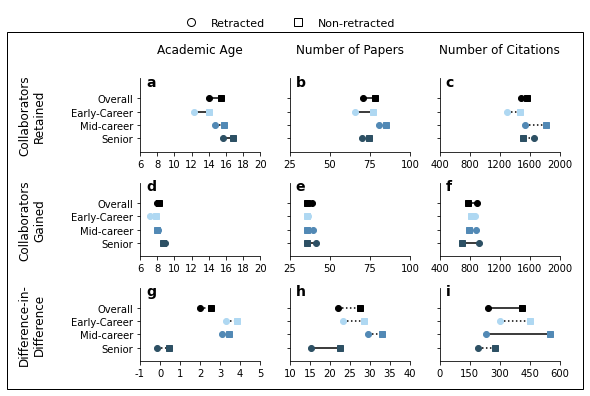

In [10]:
categories = ['Overall','Early-Career', 'Mid-career', 'Senior']

color_dict = {'Overall':'black',
            'Early-Career':'#AFD8F2',
             'Mid-career':'#5289B5',
             'Senior': '#2D5064',
             'Retracted': 'black',
             'Non-retracted':'black'}

marker_dict = {'Retracted':'o',
             'Non-retracted':'s',
             'Overall':'o',
             'Early-Career': 'o',
             'Senior': 'o',
              'Mid-career':'o'}


xticks = [[6,8,10,12,14,16,18,20],
         [25,50,75,100],
         [400,800,1200,1600,2000],
         [6,8,10,12,14,16,18,20],
         [25,50,75,100],
         [400,800,1200,1600,2000],
         [-1,0,1,2,3,4,5],
         [10,15,20,25,30,35,40],
         [0,150,300,450,600]]

create_collaborator_char_plot(categories, retracted_means_age, 
                              nonretracted_means_age, retracted_pvals_age, 
                              color_dict, marker_dict, xticks, 
                              foutname = OUTDIR+"/collaborator_quality_bySeniority_new.pdf",
                              create_legend=True)


In [11]:
retracted_means_reason = create_lists_for_plots(dict_forReason, categories=['Overall','Misconduct','Plagiarism','Mistake'], 
                                    scientistType='retracted',
                                    statistic="mean")

nonretracted_means_reason = create_lists_for_plots(dict_forReason, categories=['Overall','Misconduct','Plagiarism','Mistake'], 
                                    scientistType='nonretracted',
                                    statistic="mean")

retracted_pvals_reason = create_pval_lists_for_plots(dict_forReason, categories=['Overall','Misconduct','Plagiarism','Mistake'],
                                    statistic="pval_welch")

Academic Age AcademicAge Retention retracted Overall 14.08
Academic Age AcademicAge Retention retracted Misconduct 13.6
Academic Age AcademicAge Retention retracted Plagiarism 12.92
Academic Age AcademicAge Retention retracted Mistake 15.64
Number of Papers MAGCumPapers Retention retracted Overall 70.78
Number of Papers MAGCumPapers Retention retracted Misconduct 73.71
Number of Papers MAGCumPapers Retention retracted Plagiarism 63.62
Number of Papers MAGCumPapers Retention retracted Mistake 76.44
Number of Citations MAGCumCitations Retention retracted Overall 1482.94
Number of Citations MAGCumCitations Retention retracted Misconduct 1481.65
Number of Citations MAGCumCitations Retention retracted Plagiarism 1176.27
Number of Citations MAGCumCitations Retention retracted Mistake 1835.4
Academic Age AcademicAge Gain retracted Overall 8.0
Academic Age AcademicAge Gain retracted Misconduct 8.35
Academic Age AcademicAge Gain retracted Plagiarism 6.79
Academic Age AcademicAge Gain retracted 

In [12]:
expFields = ['Academic Age', 'Number of Papers', 'Number of Citations']
outcomeTypes = ['Retention', 'Gain', 'DiD']
categories = ['Overall','Misconduct','Plagiarism','Mistake']


combos = []

for e in expFields:
    for o in outcomeTypes:
        for c in categories:
            combos.append(e+","+o+","+c)


counter = 0
            
for i in range(len(retracted_pvals_reason)):
    for j in range(len(retracted_pvals_reason[i])):
        
        combo_i = combos[counter]
        counter += 1
        
        retracted_mean = retracted_means_reason[i][j]
        nonretracted_mean = nonretracted_means_reason[i][j]
        
        retracted_pval = retracted_pvals_reason[i][j]
        
        printString = ""
        
        if(retracted_pval < 0.05):
            if(retracted_mean < nonretracted_mean):
                printString = combo_i + "," + str(retracted_mean) + "," + str(nonretracted_mean) + "***," + str(retracted_pval)
            else:
                printString = combo_i + "," + str(retracted_mean) + "***," + str(nonretracted_mean) + "," + str(retracted_pval)
            
        else:
            printString = combo_i + "," + str(retracted_mean) + "," + str(nonretracted_mean) + "," + str(retracted_pval)
        
        print(printString)

Academic Age,Retention,Overall,14.08,15.41***,0.0
Academic Age,Retention,Misconduct,13.6,15.05***,0.022
Academic Age,Retention,Plagiarism,12.92,15.33***,0.0
Academic Age,Retention,Mistake,15.64,16.01,0.522
Academic Age,Gain,Overall,70.78,78.15***,0.026
Academic Age,Gain,Misconduct,73.71,82.14,0.351
Academic Age,Gain,Plagiarism,63.62,69.02,0.317
Academic Age,Gain,Mistake,76.44,81.5,0.337
Academic Age,DiD,Overall,1482.94,1566.66,0.486
Academic Age,DiD,Misconduct,1481.65,1801.16,0.143
Academic Age,DiD,Plagiarism,1176.27,1043.61,0.657
Academic Age,DiD,Mistake,1835.4,1866.87,0.874
Number of Papers,Retention,Overall,8.0,8.18,0.419
Number of Papers,Retention,Misconduct,8.35,8.31,0.931
Number of Papers,Retention,Plagiarism,6.79,7.98***,0.005
Number of Papers,Retention,Mistake,8.88,8.44,0.234
Number of Papers,Gain,Overall,38.76,35.73,0.062
Number of Papers,Gain,Misconduct,45.22***,35.22,0.018
Number of Papers,Gain,Plagiarism,32.66,34.38,0.525
Number of Papers,Gain,Mistake,41.79,38.51,0.288
Numb

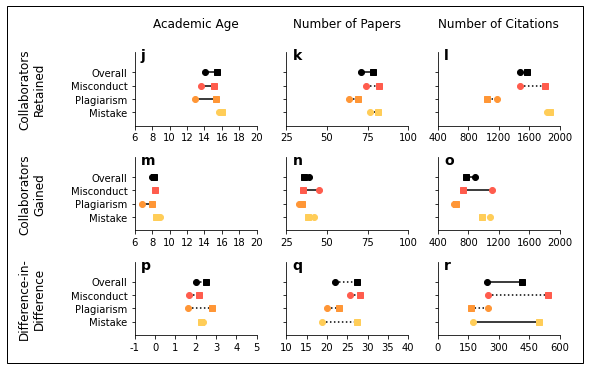

In [13]:
categories = ['Overall','Misconduct', 'Plagiarism', 'Mistake']

color_dict = {'Misconduct':'#7B2869',
             'Plagiarism':'#C85C8E',
             'Mistake': '#FFBABA',
             'Retracted': 'black',
             'Non-retracted':'black'}

color_dict = {'Overall':'black',
             'Misconduct':'#FF5C4D',
             'Plagiarism':'#FF9636',
             'Mistake': '#FFCD58',
             'Retracted': 'black',
             'Non-retracted':'black'}

marker_dict = {'Retracted':'o',
             'Non-retracted':'s',
             'Overall':'o',
             'Misconduct': 'o',
             'Plagiarism': 'o',
              'Mistake':'o'}


xticks = [[6,8,10,12,14,16,18,20],
         [25,50,75,100],
         [400,800,1200,1600,2000],
         [6,8,10,12,14,16,18,20],
         [25,50,75,100],
         [400,800,1200,1600,2000],
         [-1,0,1,2,3,4,5],
         [10,15,20,25,30,35,40],
         [0,150,300,450,600]]

create_collaborator_char_plot(categories, retracted_means_reason, 
                              nonretracted_means_reason, retracted_pvals_reason, 
                              color_dict, marker_dict, xticks, 
                              foutname = OUTDIR+"/collaborator_quality_byReason_new.pdf",
                              create_legend=False,
                             letters = ['j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r'])

In [14]:
# Plotting for attention

retracted_means_attention = create_lists_for_plots(dict_forAttention, categories=['Overall','HighAttention','LowAttention'], 
                                    scientistType='retracted',
                                    statistic="mean")

nonretracted_means_attention = create_lists_for_plots(dict_forAttention, categories=['Overall','HighAttention','LowAttention'], 
                                    scientistType='nonretracted',
                                    statistic="mean")

retracted_pvals_attention = create_pval_lists_for_plots(dict_forAttention, categories=['Overall','HighAttention','LowAttention'],
                                    statistic="pval_welch")

Academic Age AcademicAge Retention retracted Overall 14.08
Academic Age AcademicAge Retention retracted HighAttention 14.17
Academic Age AcademicAge Retention retracted LowAttention 14.07
Number of Papers MAGCumPapers Retention retracted Overall 70.78
Number of Papers MAGCumPapers Retention retracted HighAttention 76.46
Number of Papers MAGCumPapers Retention retracted LowAttention 70.19
Number of Citations MAGCumCitations Retention retracted Overall 1482.94
Number of Citations MAGCumCitations Retention retracted HighAttention 1844.83
Number of Citations MAGCumCitations Retention retracted LowAttention 1445.56
Academic Age AcademicAge Gain retracted Overall 8.0
Academic Age AcademicAge Gain retracted HighAttention 8.92
Academic Age AcademicAge Gain retracted LowAttention 7.9
Number of Papers MAGCumPapers Gain retracted Overall 38.76
Number of Papers MAGCumPapers Gain retracted HighAttention 45.34
Number of Papers MAGCumPapers Gain retracted LowAttention 38.06
Number of Citations MAGCum

In [15]:
expFields = ['Academic Age', 'Number of Papers', 'Number of Citations']
outcomeTypes = ['Retention', 'Gain', 'DiD']
categories = ['Overall','HighAttention','LowAttention']


combos = []

for e in expFields:
    for o in outcomeTypes:
        for c in categories:
            combos.append(e+","+o+","+c)


counter = 0
            
for i in range(len(retracted_pvals_attention)):
    for j in range(len(retracted_pvals_attention[i])):
        
        combo_i = combos[counter]
        counter += 1
        
        retracted_mean = retracted_means_attention[i][j]
        nonretracted_mean = nonretracted_means_attention[i][j]
        
        retracted_pval = retracted_pvals_attention[i][j]
        
        printString = ""
        
        if(retracted_pval < 0.05):
            if(retracted_mean < nonretracted_mean):
                printString = combo_i + "," + str(retracted_mean) + "," + str(nonretracted_mean) + "***," + str(retracted_pval)
            else:
                printString = combo_i + "," + str(retracted_mean) + "***," + str(nonretracted_mean) + "," + str(retracted_pval)
            
        else:
            printString = combo_i + "," + str(retracted_mean) + "," + str(nonretracted_mean) + "," + str(retracted_pval)
        
        print(printString)

Academic Age,Retention,Overall,14.08,15.41***,0.0
Academic Age,Retention,HighAttention,14.17,17.02***,0.003
Academic Age,Retention,LowAttention,14.07,15.25***,0.0
Academic Age,Gain,Overall,70.78,78.15***,0.026
Academic Age,Gain,HighAttention,76.46,105.41,0.053
Academic Age,Gain,LowAttention,70.19,75.33,0.12
Academic Age,DiD,Overall,1482.94,1566.66,0.486
Academic Age,DiD,HighAttention,1844.83,2650.77***,0.044
Academic Age,DiD,LowAttention,1445.56,1454.69,0.942
Number of Papers,Retention,Overall,8.0,8.18,0.419
Number of Papers,Retention,HighAttention,8.92,9.14,0.77
Number of Papers,Retention,LowAttention,7.9,8.08,0.45
Number of Papers,Gain,Overall,38.76,35.73,0.062
Number of Papers,Gain,HighAttention,45.34,46.94,0.785
Number of Papers,Gain,LowAttention,38.06***,34.55,0.036
Number of Papers,DiD,Overall,893.43***,773.14,0.033
Number of Papers,DiD,HighAttention,1301.76,1318.39,0.946
Number of Papers,DiD,LowAttention,850.47***,715.77,0.017
Number of Citations,Retention,Overall,2.01,2.52,0.08

In [16]:
def create_collaborator_char_plot(categories, retracted_data, non_retracted_data, p_data, color_dict, marker_dict, 
                                  xticks, foutname, create_legend=False, 
                                 letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']):
    # Generate some random data for demonstration

    # Set the significance threshold for connecting lines
    significance_threshold = 0.05

    # Create the figure with subplots
    fig, axs = plt.subplots(3, 3, figsize=(8, 5.5), sharey='row')
    fig.subplots_adjust(hspace=0.5)

    counter = 0
    
    colors = [color_dict.get(categories[0]),
            color_dict.get(categories[1]),
             color_dict.get(categories[2]),]
    
    # Iterate over each subplot
    for i, ax in enumerate(axs.flat):
        category_index = i % 3  # Determine the category (0, 1, or 2)
        retracted_values = retracted_data[counter]
        non_retracted_values = non_retracted_data[counter]
        pval_values = p_data[counter]
    
        # Connect the dots with solid or dotted lines based on significance
        for j in range(len(retracted_values)):
            line_style = '-' if pval_values[j] < significance_threshold else ':'
            ax.plot([retracted_values[j], non_retracted_values[j]], [j + 1, j + 1], 'k', linestyle=line_style)
            
        # This is the code to go with.
        for x, y, color in zip(retracted_values, [1,2,3], colors):
            ax.plot(x, y, color=color, label='Retracted', marker='o')

        for x, y, color in zip(non_retracted_values, [1,2,3], colors):
            ax.plot(x, y, color=color, label='Non-retracted', marker='s')


        
        ax.set_xticks(xticks[counter])
        ax.set_xticklabels(xticks[counter])
        
        ax.set_yticks([1, 2, 3])
        ax.set_yticklabels(categories)
        ax.set_ylim(-0.5, 4)
        ax.spines[['right', 'top']].set_visible(False)
        
        ax.invert_yaxis()
        
        ax.annotate(letters[i], xy=(0.05, 0.9), xycoords='axes fraction', fontsize=14, fontweight='bold')
        
        counter += 1
        
        # Labeling the x and y axis
        if(counter == 1):
            ax.set_ylabel('Collaborators\nRetained', labelpad=25, fontsize=12)
            ax.set_xlabel("Academic Age", labelpad=25, fontsize=12)
            ax.xaxis.set_label_position("top")
        
        elif(counter == 2):
            ax.set_xlabel("Number of Papers", labelpad=25, fontsize=12)
            ax.xaxis.set_label_position("top")
            
        elif(counter == 3):
            ax.set_xlabel("Number of Citations", labelpad=25, fontsize=12)
            ax.xaxis.set_label_position("top")
        
        elif(counter == 4):
            ax.set_ylabel('Collaborators\nGained', labelpad=25, fontsize=12)
            
        elif(counter == 7):
            ax.set_ylabel('Difference-in-\nDifference', labelpad=25, fontsize=12)

    if(create_legend):
        # Create a custom legend
        # Let us add items to the legend 
        legend_elements = []
        for key in color_dict.keys():
            colori = color_dict.get(key)
            markeri = marker_dict.get(key)
    
            elementi = None
        
            if key == "Retracted":
            # Create an empty circle as a marker
                elementi = plt.Line2D([0], [1], marker='o', color=colori, markerfacecolor='none', 
                                      markersize=8, label=key, linestyle='', fillstyle='none')
                legend_elements.append(elementi)
            elif key == "Non-retracted":
            # Create an empty square as a marker
                elementi = plt.Line2D([0], [1], marker='s', color=colori, markerfacecolor='none', 
                                  markersize=8, label=key, linestyle='', fillstyle='none')
                legend_elements.append(elementi)

            

        #fig.legend(handles=legend_elements, loc='lower right')
        legend = fig.legend(handles=legend_elements, loc='upper center', ncol=len(legend_elements), prop={'size': 11},
                  frameon=False)
        legend.set_bbox_to_anchor((0.5, 0.98))
    
    rect = Rectangle((0, 0), 1, 0.90, transform=fig.transFigure, fill=False, edgecolor='black')

    fig.patches.append(rect)

    # Adjust the layout to accommodate the legend
    plt.tight_layout(rect=[0, 0, 1, 0.90])
    #plt.tight_layout()
    
    plt.savefig(foutname, format='pdf')
    # Show the plot
    #plt.show()

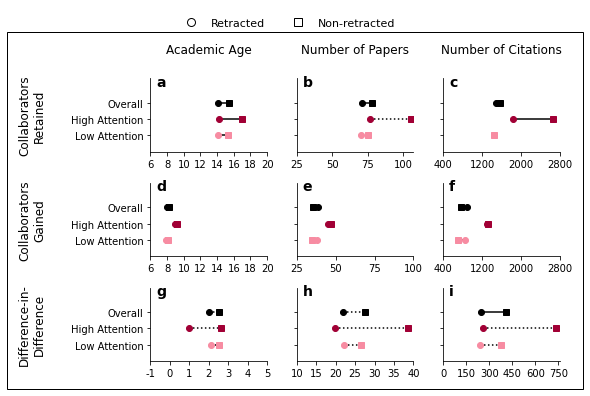

In [17]:
categories = ['Overall','High Attention','Low Attention']

color_dict = {'Overall':'black',
            'High Attention':'#A10035',
             'Low Attention':'#F78CA2',
             'Retracted': 'black',
             'Non-retracted':'black'}


marker_dict = {'Retracted':'o',
             'Non-retracted':'s',
             'Overall':'o',
             'HighAttention': 'o',
             'LowAttention': 'o'}

xticks = [[6,8,10,12,14,16,18,20],
         [25,50,75,100],
         [400,1200,2000,2800],
         [6,8,10,12,14,16,18,20],
         [25,50,75,100],
         [400,1200,2000,2800],
         [-1,0,1,2,3,4,5],
         [10,15,20,25,30,35,40],
         [0,150,300,450,600,750]]

create_collaborator_char_plot(categories, retracted_means_attention, 
                              nonretracted_means_attention, retracted_pvals_attention, 
                              color_dict, marker_dict, xticks, 
                              foutname = OUTDIR+"/collaborator_quality_byAttention_new.pdf",
                              create_legend=True,
                             letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'])